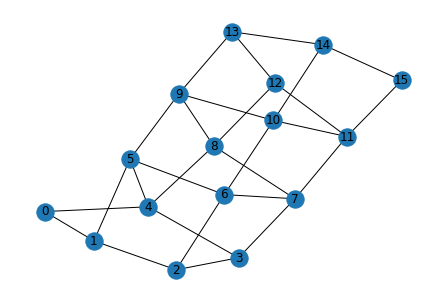

In [57]:
import networkx as nx
import numpy as np
from networkx.drawing.nx_agraph import graphviz_layout

# Create graph
G = nx.Graph()

# Add nodes and edges
for i in range(16):
    G.add_edge(i, i+4)
    G.add_edge(i, i-4)
    G.add_edge(i, i+1)
    G.add_edge(i, i-1)

G.remove_nodes_from([n for n in G.nodes if n >= 16 or n < 0])

nx.draw(G, with_labels=True, pos=graphviz_layout(G))

In [62]:
bfs0 = nx.bfs_tree(G, 0)
dfs0 = nx.dfs_tree(G, 0)
# nx.draw(bfs0, with_labels=True, pos=graphviz_layout(bfs0))
# nx.draw(dfs0, with_labels=True, pos=graphviz_layout(dfs0))
# order = list(bfs0.nodes)
# order = list(dfs0.nodes)
order = range(16)
print(order)
# for ts in nx.all_topological_sorts(bfs0):
#     print(ts)

dists = []
for i in range(16):
    print(f"NODE {i}")
    for n in G[i]:
        dist = abs(order.index(n) - order.index(i))
        dists.append(dist)
        print(f"Neighbor {n} is distance {dist}")
    print()
dists = np.array(dists)
print("Mean dist:", dists.mean())
print("Stdev dist:", dists.std())


[0, 4, 3, 2, 1, 5, 9, 8, 7, 6, 10, 14, 13, 12, 11, 15]
NODE 0
Neighbor 4 is distance 1
Neighbor 1 is distance 4

NODE 1
Neighbor 0 is distance 4
Neighbor 5 is distance 1
Neighbor 2 is distance 1

NODE 2
Neighbor 1 is distance 1
Neighbor 6 is distance 6
Neighbor 3 is distance 1

NODE 3
Neighbor 2 is distance 1
Neighbor 7 is distance 6
Neighbor 4 is distance 1

NODE 4
Neighbor 0 is distance 1
Neighbor 3 is distance 1
Neighbor 8 is distance 6
Neighbor 5 is distance 4

NODE 5
Neighbor 1 is distance 1
Neighbor 4 is distance 4
Neighbor 9 is distance 1
Neighbor 6 is distance 4

NODE 6
Neighbor 2 is distance 6
Neighbor 5 is distance 4
Neighbor 10 is distance 1
Neighbor 7 is distance 1

NODE 7
Neighbor 3 is distance 6
Neighbor 6 is distance 1
Neighbor 11 is distance 6
Neighbor 8 is distance 1

NODE 8
Neighbor 4 is distance 6
Neighbor 7 is distance 1
Neighbor 12 is distance 6
Neighbor 9 is distance 1

NODE 9
Neighbor 5 is distance 1
Neighbor 8 is distance 1
Neighbor 13 is distance 6
Neighbor 10 